# Load in some Economic Data

Note that this data has been scaled and normalized so that everything has a mean of 0 and a standard deviation of 1 (z-score).

In [1]:
%matplotlib inline
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('financial_indicators3.csv')
df.set_index('DATE',inplace=True)
df.dropna(inplace=True)

## Normalize
df = df.apply(lambda x: (x-x.mean())/ x.std(), axis=1) # ALWAYS DO THIS TO NORMALIZE FOR PCA / this is a z-score
df.head()

,inflation,Real_Personal_consumption,industrial_prod,money_supply,oil,ten_yr_two_yr_spread,trade_weighted_dollar,unemployment_rate
DATE,,,,,,,,
1987-02-01,0.347961,-2.474192,0.350648,0.376367,0.397480,0.341129,0.322243,0.338365
1987-03-01,0.135525,-2.131379,0.158357,0.327967,1.515238,0.052677,-0.083011,0.024626
1987-04-01,-0.069342,-1.201005,-0.047153,0.180289,2.249458,-0.252405,-0.540868,-0.318974
1987-05-01,0.287168,-2.374557,0.314703,0.397308,0.981664,0.180393,0.066887,0.146433
1987-06-01,0.303477,-2.445793,0.318866,0.328824,0.717180,0.271883,0.244635,0.260929


In [2]:
df.shape

(349, 8)

## Lets look at it

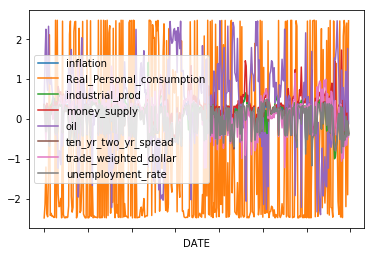

In [3]:
df.plot()

## This is a mess, so lets smooth it out by doing a 12 month rolling average

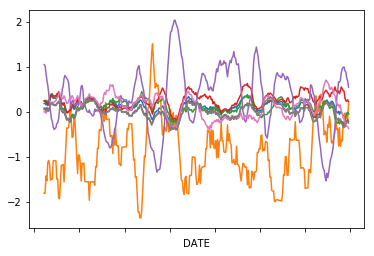

In [4]:
df.rolling(12).mean().plot(legend=False) #rolls 1-12, then 2-13, 3-14 etc. there is overlap

This is better, but you can still see a lot of very correlated variables and two particularly volatile ones that seem to be negatively correlated

In [5]:
df.corr()

,inflation,Real_Personal_consumption,industrial_prod,money_supply,oil,ten_yr_two_yr_spread,trade_weighted_dollar,unemployment_rate
inflation,1.000000,-0.892910,0.882184,0.787346,-0.108344,0.930836,0.741271,0.914167
Real_Personal_consumption,-0.892910,1.000000,-0.808670,-0.692329,-0.311429,-0.844267,-0.606327,-0.824074
industrial_prod,0.882184,-0.808670,1.000000,0.661838,-0.117075,0.818083,0.669412,0.786856
money_supply,0.787346,-0.692329,0.661838,1.000000,-0.148883,0.621392,0.577948,0.575252
oil,-0.108344,-0.311429,-0.117075,-0.148883,1.000000,-0.133078,-0.402623,-0.138310
ten_yr_two_yr_spread,0.930836,-0.844267,0.818083,0.621392,-0.133078,1.000000,0.709863,0.991283
trade_weighted_dollar,0.741271,-0.606327,0.669412,0.577948,-0.402623,0.709863,1.000000,0.707505
unemployment_rate,0.914167,-0.824074,0.786856,0.575252,-0.138310,0.991283,0.707505,1.000000


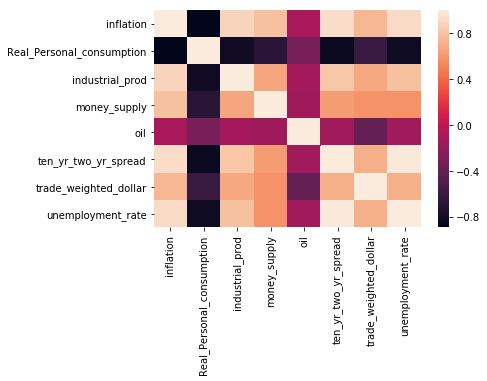

In [6]:
sns.heatmap(df.corr())

## PCA can help!

The below code shows that with two "principal components" you can capture > 97% of the variation!

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(df.drop('inflation', axis=1))
pca.explained_variance_ratio_

array([0.77973177, 0.19289192])

## Lets look at these things

In [8]:
pcs = pca.transform(df.drop('inflation',axis=1))
pcs = pd.DataFrame(pcs, columns = ['PC1','PC2'])
pcs.head()

,PC1,PC2
0,-1.713359,0.178893
1,-1.408094,-1.091999
2,-0.459849,-2.073085
3,-1.632601,-0.483905
4,-1.698807,-0.169229


## On their own, they are uninterpretable

In [9]:
pcs.columns = ['thing_1','thing_2']

## Lets see how they vary over time

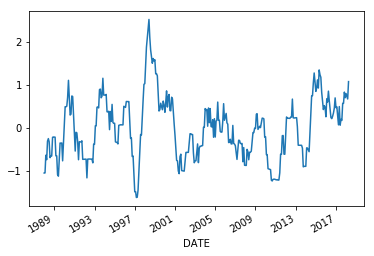

In [10]:
pcs.index = pd.to_datetime(df.index)
pcs['thing_1'].rolling(12).mean().plot()

#done in z scores, -3 -> 3, 3 stds

Now I can use this single feature in a regression without all of that noise clogging my outputs

In [11]:
df.head()

,inflation,Real_Personal_consumption,industrial_prod,money_supply,oil,ten_yr_two_yr_spread,trade_weighted_dollar,unemployment_rate
DATE,,,,,,,,
1987-02-01,0.347961,-2.474192,0.350648,0.376367,0.397480,0.341129,0.322243,0.338365
1987-03-01,0.135525,-2.131379,0.158357,0.327967,1.515238,0.052677,-0.083011,0.024626
1987-04-01,-0.069342,-1.201005,-0.047153,0.180289,2.249458,-0.252405,-0.540868,-0.318974
1987-05-01,0.287168,-2.374557,0.314703,0.397308,0.981664,0.180393,0.066887,0.146433
1987-06-01,0.303477,-2.445793,0.318866,0.328824,0.717180,0.271883,0.244635,0.260929


In [12]:
pcs.head()

,thing_1,thing_2
DATE,,
1987-02-01,-1.713359,0.178893
1987-03-01,-1.408094,-1.091999
1987-04-01,-0.459849,-2.073085
1987-05-01,-1.632601,-0.483905
1987-06-01,-1.698807,-0.169229


In [13]:
df['PC_1'] = pcs['thing_1']
df.head()

,inflation,Real_Personal_consumption,industrial_prod,money_supply,oil,ten_yr_two_yr_spread,trade_weighted_dollar,unemployment_rate,PC_1
DATE,,,,,,,,,
1987-02-01,0.347961,-2.474192,0.350648,0.376367,0.397480,0.341129,0.322243,0.338365,-1.713359
1987-03-01,0.135525,-2.131379,0.158357,0.327967,1.515238,0.052677,-0.083011,0.024626,-1.408094
1987-04-01,-0.069342,-1.201005,-0.047153,0.180289,2.249458,-0.252405,-0.540868,-0.318974,-0.459849
1987-05-01,0.287168,-2.374557,0.314703,0.397308,0.981664,0.180393,0.066887,0.146433,-1.632601
1987-06-01,0.303477,-2.445793,0.318866,0.328824,0.717180,0.271883,0.244635,0.260929,-1.698807


In [19]:
?LinearRegression().fit()

In [23]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(df['PC_1'].values.reshape(-1,1), df['inflation'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
regression.coef_

array([-0.13271296])

In [27]:
regression.score(df['PC_1'].values.reshape(-1,1), df['inflation'])

0.7790902187113105

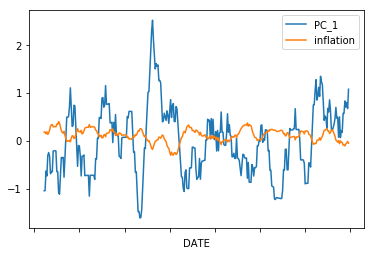

In [33]:
df[['PC_1','inflation']].rolling(12).mean().plot()

In [ ]:
#df[['PC_1','inflation']].rolling(12).mean().to_csv('pc_inflation.csv')

### see csv example that shows graph of inflation negatively correlated to pcs 1 - this is what was driving it all along... replicate that graph in python with matplotlib

## PCA for Plotting

In [34]:
del(df)
df = pd.read_csv('capitol_words.csv', sep='|', encoding='utf-8')
df['speaker_name'].value_counts()

Bernie Sanders     2241
Joseph Biden       1854
Rick Santorum      1613
Mike Pence         1238
Lindsey Graham     1158
Hillary Clinton     830
Rand Paul           455
Barack Obama        411
Jim Webb            381
Ted Cruz            365
Marco Rubio         359
John Kasich         316
Lincoln Chafee      154
Joe Biden             1
Name: speaker_name, dtype: int64

In [35]:
speaker_1 = df.loc[df['speaker_name'] == 'Rick Santorum', ['speaker_name', 'text']]
speaker_2 = df.loc[df['speaker_name'] == 'Joseph Biden', ['speaker_name', 'text']]

df_new = pd.concat([speaker_1, speaker_2])
df_new.reset_index(inplace=True)
df_new.head()

,index,speaker_name,text
0,4,Rick Santorum,"Mr. President, I wanted to follow up the remar..."
1,5,Rick Santorum,"Mr. President, I ask unanimous consent that th..."
2,11,Rick Santorum,"Mr. President, I ask unanimous consent that th..."
3,12,Rick Santorum,"Mr. President, I ask unanimous consent that th..."
4,13,Rick Santorum,"Mr. President, I ask unanimous consent that th..."


In [13]:
df_new.shape

(3467, 3)

In [14]:
df_new.tail()

,index,speaker_name,text
3462,8267,Joseph Biden,"Mr. President, today I am submitting a resolut..."
3463,8277,Joseph Biden,"Mr. President, I am very pleased that the Sena..."
3464,8278,Joseph Biden,"Mr. President, I rise today to introduce the C..."
3465,8279,Joseph Biden,"Mr. President, the State of Delaware lost one ..."
3466,8316,Joseph Biden,"Mr. President, let me begin by thanking the le..."


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(lowercase=True, stop_words='english')
speeches = vec.fit_transform(df_new['text'])
speeches

<3467x29674 sparse matrix of type '<class 'numpy.float64'>'
	with 523660 stored elements in Compressed Sparse Row format>

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
speeches_pca = pca.fit_transform(speeches.todense())

In [17]:
speeches_pca.shape

(3467, 2)

In [18]:
vis_df = pd.DataFrame(speeches_pca, columns = ['PC1','PC2'])
vis_df.head()

,PC1,PC2
0,-0.086752,-0.054956
1,0.868563,-0.234300
2,0.034168,0.022520
3,0.134153,0.044481
4,0.131369,0.047367


In [19]:
df = pd.concat([df_new, vis_df], axis=1)

In [20]:
df.head()

,index,speaker_name,text,PC1,PC2
0,4,Rick Santorum,"Mr. President, I wanted to follow up the remar...",-0.086752,-0.054956
1,5,Rick Santorum,"Mr. President, I ask unanimous consent that th...",0.868563,-0.234300
2,11,Rick Santorum,"Mr. President, I ask unanimous consent that th...",0.034168,0.022520
3,12,Rick Santorum,"Mr. President, I ask unanimous consent that th...",0.134153,0.044481
4,13,Rick Santorum,"Mr. President, I ask unanimous consent that th...",0.131369,0.047367


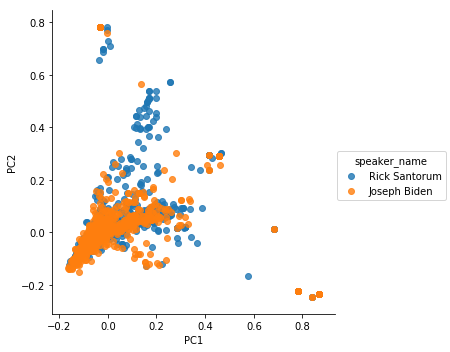

In [21]:
sns.lmplot(x='PC1',y='PC2', hue='speaker_name', fit_reg = False, data = df)